In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getData02(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('eta_electron')
    scalar.append('p_electron')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
file1 = ["$HOME/EIC/output/102.root"]

In [4]:
a = getData02(file1)


Processed $HOME/EIC/output/102.root in 42.6 seconds


In [18]:
b = keepOneJet(a)
b1 = applyCut(b, 'Q2 > 25', 'Q2 > 25')


Remove extra jets 9009649  fraction kept: 24.8
Q2 > 25 276989  fraction kept: 3.1


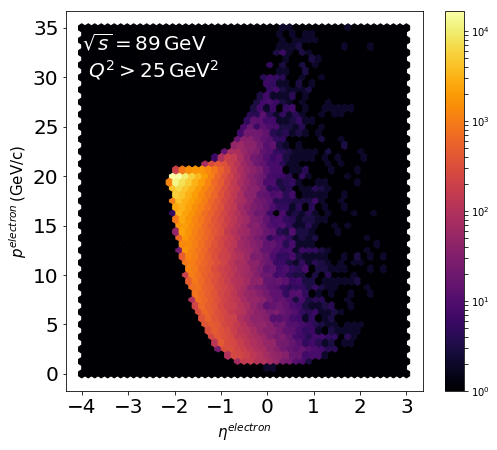

In [22]:
fig = plt.figure(figsize=(8,7))
plt.hexbin(b1['eta_electron'], b1['p_electron'], gridsize=50, norm=LogNorm(), cmap='inferno', extent=(-4, 3, 0, 35))
plt.xlabel('$\eta^{electron}$', fontsize = 15)
plt.ylabel('$ p^{electron} \, (\mathrm{GeV/c}) $', fontsize = 15)
plt.tick_params(labelsize='large')
plt.colorbar()
plt.text(-4,30,'$\sqrt{s}=89 \, \mathrm{GeV}$ \n $Q^2 > 25 \, \mathrm{GeV^2}$', fontsize=20, color='white')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('images/p_electron_vs_eta_electron_q.pdf', bbox_inches='tight')

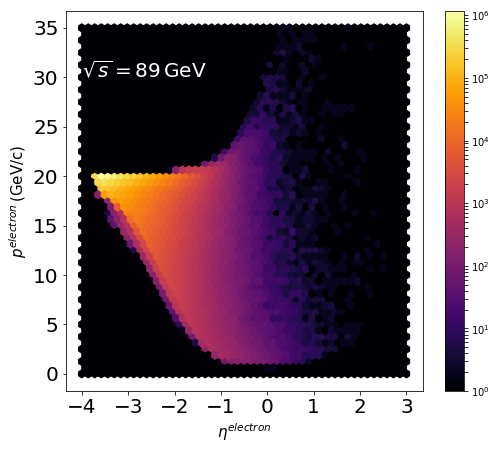

In [21]:
fig = plt.figure(figsize=(8,7))
plt.hexbin(b['eta_electron'], b['p_electron'], gridsize=50, norm=LogNorm(), cmap='inferno', extent=(-4, 3, 0, 35))
plt.xlabel('$\eta^{electron}$', fontsize = 15)
plt.ylabel('$ p^{electron} \, (\mathrm{GeV/c}) $', fontsize = 15)
plt.tick_params(labelsize='large')
plt.colorbar()
plt.text(-4,30,'$\sqrt{s}=89 \, \mathrm{GeV}$', fontsize=20, color='white')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('images/p_electron_vs_eta_electron.pdf', bbox_inches='tight')